In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url2 = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'
page2 = requests.get(url2)
soup2 = BeautifulSoup(page2.text,'html')

# Data

In [ ]:
table = soup2.find_all('table')[1]
table2 = soup2.find('table',class_ = 'wikitable sorttable')

# Column Names

In [ ]:
world_titles = table.find_all('th')
world_table_titles = [title.text.strip() for title in world_titles]
print(world_table_titles)

['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


# Make column names as Dataframe

In [ ]:
pd.DataFrame(columns = world_table_titles )

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [ ]:
column_data = table.find_all('tr')
df = pd.DataFrame(columns = world_table_titles )
for row in column_data[1:]:
  row_data = row.find_all('td')
  individual_row_data = [data.text.strip() for data in row_data]
  length = len(df)
  # print(length)
  df.loc[length] = individual_row_data

df['Employees'] = df['Employees'].str.replace(',', '').astype(int)
df['Revenue (USD millions)'] = df['Revenue (USD millions)'].str.replace(',', '').astype(int)
df.head()





,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,611289,6.7%,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,513983,9.4%,1540000,"Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,413680,44.8%,62000,"Spring, Texas"
3,4,Apple,Electronics industry,394328,7.8%,164000,"Cupertino, California"
4,5,UnitedHealth Group,Healthcare,324162,12.7%,400000,"Minnetonka, Minnesota"


<Axes: xlabel='Industry'>

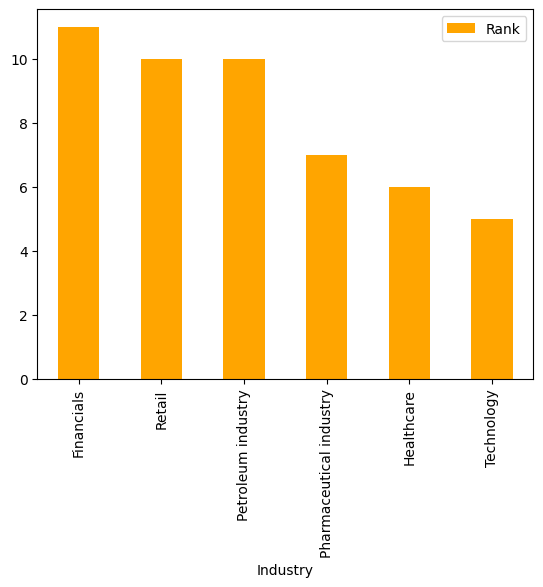

In [ ]:
df.groupby(['Industry']).agg({'Rank':'count'}).sort_values(by ='Rank', ascending = False).head(6).plot(kind = 'bar' , color = 'orange')
